# Linear Regression Example

In [2]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, linear_model

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# 시각화 라이브러리 선언
import matplotlib.pyplot as plt

### 1. 분석데이터 로딩

In [3]:
#CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("./dataset./feature_regression_example.csv")

In [4]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
YEARWEEK,1.000000,0.961051,0.213022,0.037392,-0.030681,0.300320
YEAR,0.961051,1.000000,-0.065302,-0.048803,0.067443,0.208435
WEEK,0.213022,-0.065302,1.000000,0.307541,-0.349205,0.347462
QTY,0.037392,-0.048803,0.307541,1.000000,-0.544920,0.712772
HCLUS,-0.030681,0.067443,-0.349205,-0.544920,1.000000,-0.552991
PRO_PERCENT,0.300320,0.208435,0.347462,0.712772,-0.552991,1.000000


In [5]:
featuresData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442


### 2.데이터 형 변환

In [6]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [7]:
#형변환
featuresData[['WEEK','QTY','PRO_PERCENT']]=featuresData[['WEEK','QTY','PRO_PERCENT']].astype('float64')
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK            float64
QTY             float64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

### 3. 문자데이터 코드변환(Vector연산)

In [8]:
#case when 
############################
def codeConversion(df):
    if df == "Y":
        return 1
    else:
        return 0

In [9]:
featuresData['PROMOTIONCODE'] = featuresData['PROMOTION'].apply(codeConversion)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1.0,1225.0,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2.0,968.0,N,4,Y,0.209442,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3.0,1209.0,N,4,Y,0.208155,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4.0,1810.0,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5.0,1773.0,N,4,Y,0.208155,1


In [10]:
featuresData['HOLIDAYCODE'] = featuresData['HOLIDAY'].apply(codeConversion)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1.0,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2.0,968.0,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3.0,1209.0,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4.0,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5.0,1773.0,N,4,Y,0.208155,1,0


In [11]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1.0,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2.0,968.0,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3.0,1209.0,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4.0,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5.0,1773.0,N,4,Y,0.208155,1,0


### 4. 데이터 셋 분리

In [12]:
predictStd = 201630

In [13]:
#where between and (조건 절)
trainingData = featuresData.query('YEARWEEK <= @predictStd')
trainingData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1.0,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2.0,968.0,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3.0,1209.0,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4.0,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5.0,1773.0,N,4,Y,0.208155,1,0


In [14]:
#where between and (조건 절)
testData = featuresData.query('YEARWEEK > @predictStd')
testData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31.0,1522.0,N,4,Y,0.280258,1,0
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32.0,2100.0,N,4,Y,0.280258,1,0
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33.0,43.0,N,4,N,0.000000,0,0
86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34.0,1700.0,Y,1,Y,0.308584,1,1
87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35.0,1514.0,Y,1,Y,0.308584,1,1


In [15]:
trainingData_feature = trainingData[['WEEK','PRO_PERCENT','HOLIDAYCODE']]

In [16]:
trainingData_label = trainingData[['QTY']]

In [17]:
testData_feature = testData[['WEEK','PRO_PERCENT','HOLIDAYCODE']]

In [18]:
testData_label = testData[['QTY']]

### 5. 모델선언 및 예측

In [19]:
# from sklearn import tree
model_method = linear_model.LinearRegression()

In [20]:
### Extract Coefficient 머신러닝!!

In [21]:
model = model_method.fit(trainingData_feature, trainingData_label)

In [22]:
predict = model.predict(testData_feature)

In [23]:
predict

array([[1363.12337213],
       [1367.51233386],
       [ 301.07146112],
       [1945.76874053],
       [1950.15770226],
       [1954.54666398],
       [1497.68802819],
       [1502.07698991],
       [1398.23506593],
       [1402.62402766],
       [1868.2605869 ],
       [1411.40195111],
       [ 344.96107837],
       [2422.58190441],
       [2426.97086614],
       [2431.35982787],
       [2435.74878959],
       [2440.13775132],
       [1983.27911552],
       [1722.01044627],
       [1726.399408  ],
       [2192.03596724],
       [ 200.12534144],
       [ 217.68118834]])

In [24]:
testData_label.head()

,QTY
83,1522.0
84,2100.0
85,43.0
86,1700.0
87,1514.0


### 6. 데이터 정리

In [25]:
type(predict)

numpy.ndarray

In [26]:
predictData = pd.DataFrame(predict)

In [27]:
predictData.head()

,0
0,1363.123372
1,1367.512334
2,301.071461
3,1945.768741
4,1950.157702


In [28]:
predictData.columns = ["PREDICT"]

In [29]:
testData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31.0,1522.0,N,4,Y,0.280258,1,0


In [30]:
testData.reset_index(drop=True, inplace=True)

In [31]:
testData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31.0,1522.0,N,4,Y,0.280258,1,0
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32.0,2100.0,N,4,Y,0.280258,1,0


In [32]:
predictData.reset_index(drop=True, inplace=True)

In [33]:
#testData_feature.reset_index(drop=True, inplace=True)

In [34]:
#cncatenate labels to df as a new column / column binding
finalDf = pd.concat([testData, predictData], axis = 1)

In [35]:
finalDf.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTIONCODE,HOLIDAYCODE,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31.0,1522.0,N,4,Y,0.280258,1,0,1363.123372
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32.0,2100.0,N,4,Y,0.280258,1,0,1367.512334
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33.0,43.0,N,4,N,0.000000,0,0,301.071461
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34.0,1700.0,Y,1,Y,0.308584,1,1,1945.768741
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35.0,1514.0,Y,1,Y,0.308584,1,1,1950.157702


In [36]:
finalDf.to_csv("./dt_result_20181022.csv")

In [37]:
pwd

'D:\\pythonProject'

### 7. 정확도 측정

In [38]:
mean_absolute_error(finalDf['QTY'], finalDf['PREDICT'])  

455.62189421546094

In [39]:
mean_squared_error(finalDf['QTY'], finalDf['PREDICT'])  

376307.3344786445

In [40]:
r2_score(finalDf['QTY'], finalDf['PREDICT'])  

0.38670554032608817

In [41]:
finalDf.to_csv("./decisiontree_result.csv")

# 시각화

In [44]:
finalDf["QTY"].head(3)

0    1522.0
1    2100.0
2      43.0
Name: QTY, dtype: float64

Text(0,0.5,'value')

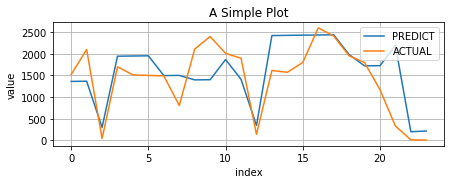

In [52]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(finalDf["WEEK"].index,finalDf["PREDICT"], label='PREDICT')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
#plt.subplot(212)

plt.plot(finalDf["WEEK"].index,finalDf["QTY"], label='ACTUAL')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')

Text(0,0.5,'value 2nd')

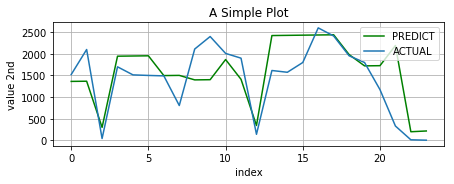

In [61]:

plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(finalDf["WEEK"].index,finalDf["PREDICT"], 'g',label='PREDICT')
plt.grid(True)
plt.legend(loc=4)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
#plt.subplot(212)
ax2 = ax1.twinx()
plt.plot(finalDf["WEEK"].index,finalDf["QTY"], label='ACTUAL')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('value 2nd')

In [62]:
# 퀴즈

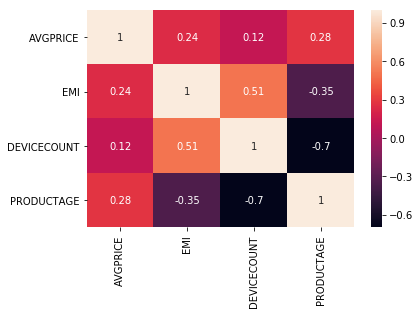

In [66]:
import pandas as pd 
# library & dataset
import seaborn as sns


%matplotlib inline

customerData = pd.read_csv("./dataset/customerdata.csv")

# 컬럼해더 재정의
customerData.columns = ['CUSTID','AVGPRICE','EMI','DEVICECOUNT','PRODUCTAGE','CUSTTYPE']

# 데이터 VIEW
customerData.head()
customerData.drop_duplicates()
#customerData.corr()

tc = customerData.corr()
sns.heatmap(tc, annot = True)

In [71]:
#g = sns.pairplot(data=customerData, hue = "CUSTTYPE")
# plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), ncol=3) #horizontal legend top
# g.savefig('d:/Test.png', bbox_inches='tight')

In [75]:
customerData.head(3)

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


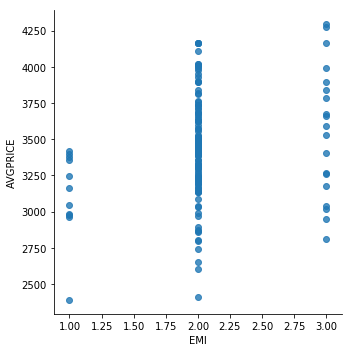

In [82]:
sns.lmplot(x="EMI", y='AVGPRICE', data=customerData,fit_reg=True,lowess=True)